<a href="https://colab.research.google.com/github/Ry02024/Complex-System/blob/main/random_walk/random_walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

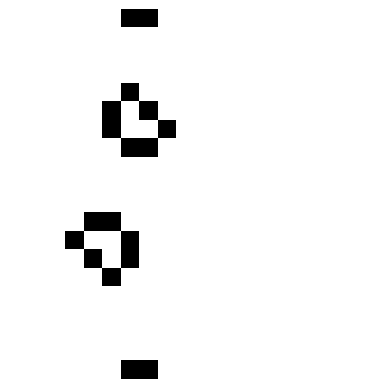

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def initialize_grid(size, density=0.2):
    """ランダムに初期グリッドを生成"""
    return np.random.choice([0, 1], size=(size, size), p=[1 - density, density])

def count_neighbors(grid, x, y):
    """セル(x, y)の近傍の生存セル数をカウント"""
    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),          (0, 1),
        (1, -1), (1, 0), (1, 1),
    ]
    count = 0
    for dx, dy in neighbors:
        nx, ny = (x + dx) % grid.shape[0], (y + dy) % grid.shape[1]
        count += grid[nx, ny]
    return count

def update_grid(grid):
    """次の世代のグリッドを計算"""
    new_grid = grid.copy()
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            neighbors = count_neighbors(grid, x, y)
            if grid[x, y] == 1:
                if neighbors < 2 or neighbors > 3:
                    new_grid[x, y] = 0  # 過疎または過密で死亡
            elif grid[x, y] == 0:
                if neighbors == 3:
                    new_grid[x, y] = 1  # 誕生
    return new_grid

def animate_colab(grid, steps=100):
    """アニメーションをColabで直接表示"""
    fig, ax = plt.subplots()
    img = ax.imshow(grid, cmap="binary")
    ax.axis('off')

    def update(frame):
        nonlocal grid
        grid = update_grid(grid)
        img.set_data(grid)
        return img,

    ani = animation.FuncAnimation(fig, update, frames=steps, interval=200, blit=True)
    return ani

# グリッドのサイズと初期化
size = 20
grid = initialize_grid(size)

# アニメーションの生成
ani = animate_colab(grid, steps=50)

# Colabでアニメーションを直接表示
HTML(ani.to_jshtml())
